In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Definitions

In [12]:
def cone_subtended_sphere(cos_theta_max, u1, u2):
    z = 1.0 + u1 * (cos_theta_max - 1.0)
    phi = u2 * 2.0 * np.pi
    sin_theta = np.sqrt(1.0 - z * z)
    x = np.cos(phi) * sin_theta
    y = np.sin(phi) * sin_theta

    return (x, y, z)

def calc_cos_theta_max(dist_to_center, radius):
    lengthSqr = dist_to_center * dist_to_center
    sinThetaMaxSqr = radius * radius / lengthSqr
    cosThetaMax = np.sqrt(1.0 - sinThetaMaxSqr)

    return cosThetaMax

In [13]:
num_points = 500
r1 = np.random.uniform(0.0, 1.0, num_points)
r2 = np.random.uniform(0.0, 1.0, num_points)

# Spatial distribution of directions

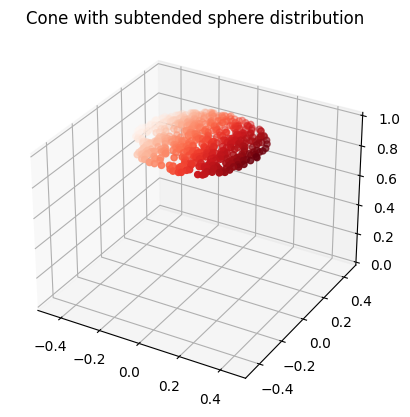

In [14]:
p = np.array([0.0, 0.0, 0.0])
c = np.array([2.0, 2.0, 2.0])
r = 1.0

to_center = c - p
dist_to_center = np.linalg.norm(to_center)
cos_theta_max = calc_cos_theta_max(dist_to_center, r)

points = [cone_subtended_sphere(cos_theta_max, u1, u2) for u1, u2 in zip(r1, r2)]
x, y, z = zip(*points)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=x, cmap='Reds')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(0, 1)
ax.set_title('Cone with subtended sphere distribution')
plt.show()

# Distribution of cos theta max values

As point $\mathbf{p}$ approaches the surface of the sphere, $\|\mathbf{c} - \mathbf{p}\|$ tends to the value of the radius. We can see from the definition of $\cos(\theta_{max})$ that it will tend to zero:

$$
\cos(\theta_{max})=\sqrt{1-\frac{r^2}{\|\mathbf{c} - \mathbf{p}\|^2}}
$$

This, in turn, implies that $\theta_{max}$ tends to $\frac{\pi}{2}$.

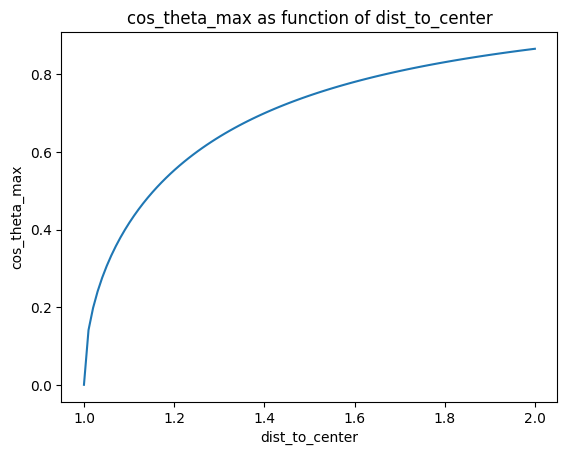

In [15]:
radius = 1.0
dist_to_center = np.linspace(1.0, 2.0, 100)
cos_theta_max = np.array([calc_cos_theta_max(x, radius) for x in dist_to_center])

plt.plot(dist_to_center, cos_theta_max)
plt.xlabel('dist_to_center')
plt.ylabel('cos_theta_max')
plt.title('cos_theta_max as function of dist_to_center')
plt.show()